In [ ]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from copy import deepcopy

CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))
from parameters.parameters_paths import PATH_TO_CROSS_SECTIONS
openmc.config['cross_sections'] = PATH_TO_CROSS_SECTIONS


In [2]:
from parameters.parameters_materials import STEEL_MATERIAL, FUEL_MATERIAL

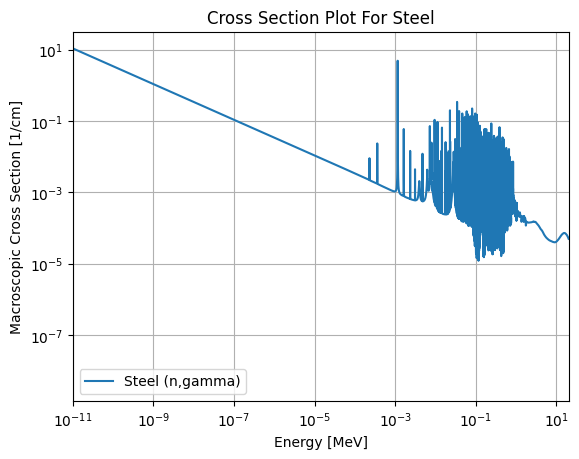

In [3]:
openmc.plotter.plot_xs(
    reactions = {
        STEEL_MATERIAL: ['(n,gamma)'],
    },
    energy_axis_units="MeV",
)
plt.title = 'Total cross section'
plt.grid()


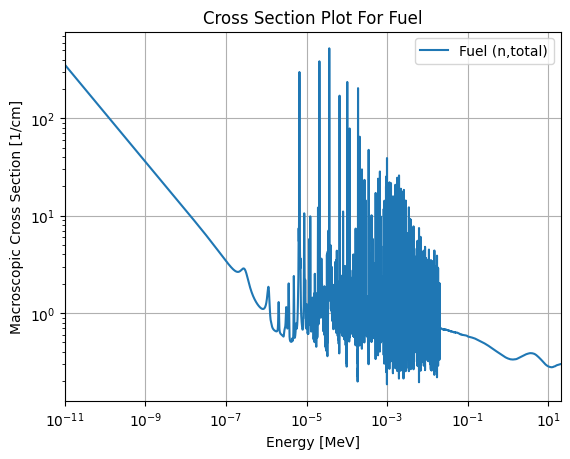

In [4]:
openmc.plotter.plot_xs(
    reactions = {
        FUEL_MATERIAL: ['(n,total)'],
    },
    energy_axis_units="MeV",
)
plt.title = 'Total cross section'
plt.grid()

In [5]:
def create_fuel_materials(enrichment, base_material):
    """
    Create a dictionary of fuel materials with various U-235 enrichments.
    
    Args:
        enrichments (list of float): List of U-235 enrichment fractions (e.g., [0.05, 0.10, 0.20]).
        base_material (openmc.Material): Base fuel material to copy and modify.
        
    Returns:
        dict: Keys are enrichment values, values are openmc.Material objects.
    """
    fuel_material = deepcopy(base_material)
    fuel_material.name = f"Fuel_{int(enrichment*100)}pct_U235"
    fuel_material.set_density('g/cm3', fuel_material.density)
    fuel_material.remove_nuclide('U235')
    fuel_material.remove_nuclide('U238')
    fuel_material.add_nuclide('U235', enrichment)
    fuel_material.add_nuclide('U238', 1.0 - enrichment)
    return fuel_material

# Example usage:
enrichments = [0.10, 0.20, 0.30, 0.40, 0.50]  # U-235 enrichment fractions
fuel_dict = {}
for enrichment in enrichments:  
    fuel_material = create_fuel_materials(enrichment, FUEL_MATERIAL)
    fuel_dict[fuel_material.name] = fuel_material


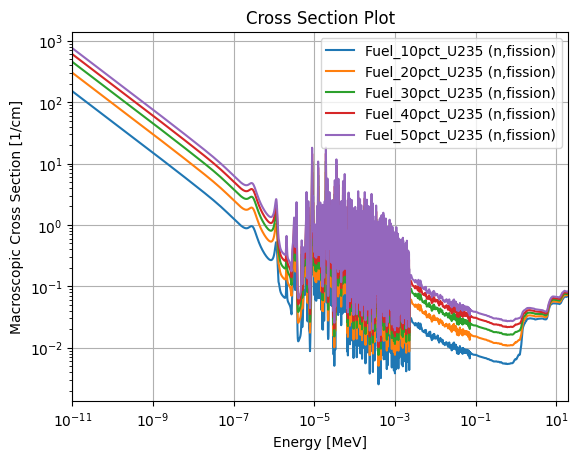

In [6]:
reactions = {fuel_dict[f"Fuel_{int(e*100)}pct_U235"]: ['(n,fission)'] for e in enrichments}
openmc.plotter.plot_xs(
    reactions=reactions,
    energy_axis_units="MeV",
)
plt.title = 'Total cross section'
plt.grid()

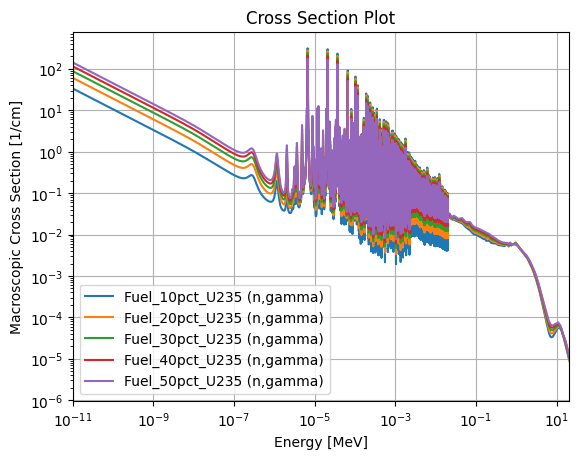

In [7]:
reactions = {fuel_dict[f"Fuel_{int(e*100)}pct_U235"]: ['(n,gamma)'] for e in enrichments}
openmc.plotter.plot_xs(
    reactions=reactions,
    energy_axis_units="MeV",
)
plt.title = 'Total cross section'
plt.grid()